<a href="https://colab.research.google.com/github/nottarun7/Machine_Learning_19ELC304/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Dividing the data into input features and output data

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]  # i/p feature
y = data[:, 1]  # o/p target
m = len(y)

## 2) Reshaping the X matrix and adding a column of 1's as the bias 𝜃<sub>0</sub> 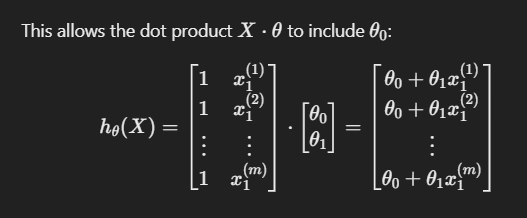

In [3]:
X = X.reshape(m, 1)
X = np.hstack([np.ones((m, 1)), X])  # Add intercept term

## 3) Initialize parameters and hyperparameters


In [4]:
theta = np.zeros((2, 1))  # Two parameters (bias and slope)

alpha = 0.01  # Learning rate
iterations = 1500

## 4) Cost function - Mean squared error
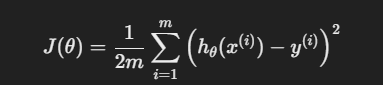

In [5]:
def costfn(X, y, theta):
    m = len(y)
    predictions = X @ theta  # Matrix multiplication
    errors = predictions - y.reshape(m, 1)
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

## 5) Gradient Descent
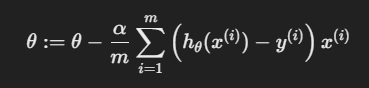

In [6]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y.reshape(m, 1)
        theta -= (alpha / m) * (X.T @ errors)
        cost_history.append(costfn(X, y, theta))

    return theta, cost_history

## 6) Train the model

In [7]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

## 7) Display the final values and plot

In [8]:
print("Theta (parameters):", theta.flatten())
print("Final cost:", cost_history[-1])

Theta (parameters): [-3.63029144  1.16636235]
Final cost: 4.483388256587725


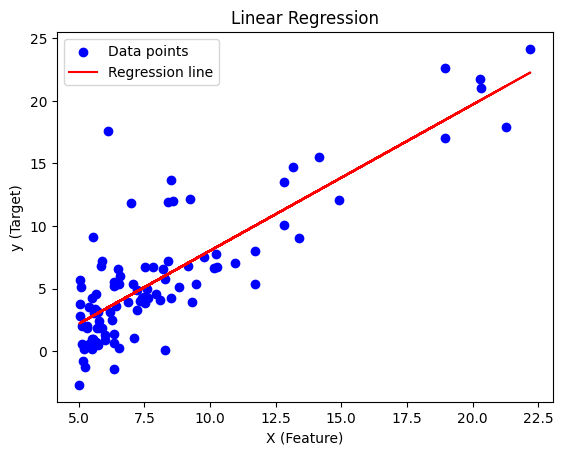

In [9]:
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data points')
plt.plot(data[:, 0], X @ theta, color='red', label='Regression line')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Linear Regression')
plt.legend()
plt.show()